In [16]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# définition les noms des colonnes
colonnes = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [20]:
# Ouverture du fichier
data = pd.read_csv("./data/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1', header=None, names=colonnes)

In [21]:
# Ajuster la largeur maximale des colonnes
pd.set_option('display.max_colwidth', None)
data.sample(20)

,target,ids,date,flag,user,text
1280389,4,2001633857,Tue Jun 02 01:32:29 PDT 2009,NO_QUERY,TuttiFrutti_,uuuh..just 4 1/2 hours left till the mission #mcflyforgermany starts i hope we make it! would be awesome
56092,0,1685294874,Sat May 02 23:47:43 PDT 2009,NO_QUERY,nisyavirginia,"@FatyaJunissa fat, I want to play golf but I can't swing it properly"
188725,0,1968936337,Fri May 29 22:35:24 PDT 2009,NO_QUERY,AmyVictoreiae,"@Rainbow4vr i dont pity u, u stlll havent sent the pic n u could be havin fun w me right now instead of your dyke camp trip."
474727,0,2177404224,Mon Jun 15 06:02:48 PDT 2009,NO_QUERY,bella_nox,"ehh - car repairs are so expensive. Have to get front calibers, rotors and pads replaced. Over $600.00"
1051575,4,1961194123,Fri May 29 09:07:34 PDT 2009,NO_QUERY,or_sh,@dboixel Thank you!
748411,0,2284294656,Mon Jun 22 13:42:25 PDT 2009,NO_QUERY,thefirstsight,I miss you so much @criistina26 you have no idea...
925975,4,1755508296,Sun May 10 09:19:09 PDT 2009,NO_QUERY,alokw,I'm a college grad now
376055,0,2051592465,Fri Jun 05 22:21:54 PDT 2009,NO_QUERY,natashadesigns,good night all
1138304,4,1976830031,Sat May 30 19:12:41 PDT 2009,NO_QUERY,glamourdolleyes,"@LindaGranillo ill be there saturday but will be in indio for 2 weeks, or yucca valley"
435120,0,2065348021,Sun Jun 07 08:24:36 PDT 2009,NO_QUERY,OlorinLorien,Rain showers again. Piddle. No grass cutting now again!


In [22]:
print("Exemples de tweets négatifs")
display(data[data["target"] == 0]["text"])

Exemples de tweets négatifs


0         @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
1             is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
2                                   @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
3                                                                             my whole body feels itchy and like its on fire 
4             @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
                                                                 ...                                                         
799995                                                        Sick  Spending my day laying in bed listening to @taylorswift13
799996                                                                                                        Gmail is

In [23]:
print("Exemples de tweets positifs")
display(data[data["target"] == 4]["text"])

Exemples de tweets positifs


800000                                                                                                  I LOVE @Health4UandPets u guys r the best!! 
800001                                                                      im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!
800002     @DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. 
800003                                      Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup
800004                                                                                               @LovesBrooklyn2 he has that effect on everyone 
                                                                             ...                                                                    
1599995                                                                                     Just woke up. 

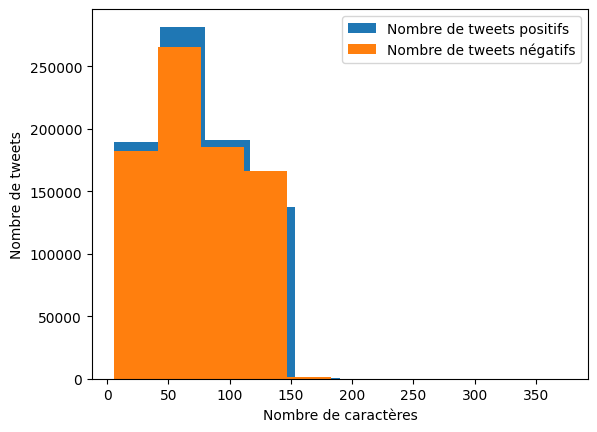

In [24]:
# Longueur des tweets
length_text_pos = data[data["target"] == 4]["text"].str.len()
length_text_neg = data[data["target"] == 0]["text"].str.len() 
plt.hist(length_text_pos, label="Nombre de tweets positifs") 
plt.hist(length_text_neg, label="Nombre de tweets négatifs") 
plt.xlabel("Nombre de caractères")
plt.ylabel("Nombre de tweets")
plt.legend() 
plt.show()

Ce sont des contenus typiques de tweets: citation (@), liens, utilisation d'abbréviations et de variations d'orthographe, ponctuation pour exprimer les sentiments <br>


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
data.nunique()

target          2
ids       1598315
date       774363
flag            1
user       659775
text      1581466
dtype: int64

In [11]:
print(data.isna().sum())

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


In [12]:
for col in data.columns:
    n = data.duplicated(subset=col).sum()
    print(f'col : {col} -> duplicated : {n}')

col : target -> duplicated : 1599998
col : ids -> duplicated : 1685
col : date -> duplicated : 825637
col : flag -> duplicated : 1599999
col : user -> duplicated : 940225
col : text -> duplicated : 18534


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trouver les doublons basés sur la colonne 'ids'
duplicates = data[data.duplicated(subset=['ids'], keep=False)]
display(duplicates.sort_values(by="ids"))

# Groupby sur 'ids' et additionner les valeurs de 'target'
grouped_data = duplicates.groupby('ids')['target'].sum().reset_index()

# Afficher les valeurs uniques de la colonne 'target'
unique_values = grouped_data['target'].unique()
print("Valeurs uniques de la colonne 'target' :", unique_values)


,target,ids,date,flag,user,text
213,0,1467863684,Mon Apr 06 22:33:35 PDT 2009,NO_QUERY,DjGundam,Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot; O-: I like the look of the new transformer movie
800261,4,1467863684,Mon Apr 06 22:33:35 PDT 2009,NO_QUERY,DjGundam,Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot; O-: I like the look of the new transformer movie
275,0,1467880442,Mon Apr 06 22:38:04 PDT 2009,NO_QUERY,iCalvin,"Haven't tweeted nearly all day Posted my website tonight, hopefully that goes well Night time!"
800300,4,1467880442,Mon Apr 06 22:38:04 PDT 2009,NO_QUERY,iCalvin,"Haven't tweeted nearly all day Posted my website tonight, hopefully that goes well Night time!"
989,0,1468053611,Mon Apr 06 23:28:09 PDT 2009,NO_QUERY,mariejamora,@hellobebe I also send some updates in plurk but i upload photos on twitter! you didnt see any of my updates on plurk? Zero?
...,...,...,...,...,...,...
524290,0,2193428118,Tue Jun 16 08:26:44 PDT 2009,NO_QUERY,bubbles00,"finally finished typing!!!! Woohoooo , still need to add graphs though"
1599440,4,2193451289,Tue Jun 16 08:28:37 PDT 2009,NO_QUERY,faiznurdavid,"@fanafatin see, @misschimichanga tweet u to join us!! u really cant? so if thurs, when &amp; where?"
524345,0,2193451289,Tue Jun 16 08:28:37 PDT 2009,NO_QUERY,faiznurdavid,"@fanafatin see, @misschimichanga tweet u to join us!! u really cant? so if thurs, when &amp; where?"
524688,0,2193576442,Tue Jun 16 08:38:45 PDT 2009,NO_QUERY,emma_b_xox,Had an injection today. Not fun the rrst of the school day has been good. Tonight i am going dancing yey


Valeurs uniques de la colonne 'target' : [4]


En faisant la somme des target sur les lignes en doublons on a uniquement la valeur "4" ce qui veut dire que c'est le résultat de 0+4 donc ce sont des tweets qui sont identiques mais ont été jugés à la fois positifs et négatifs, autant les supprimer.

In [15]:
# Trouver les doublons basés sur toutes les colonnes sauf 'target'
duplicates = data[data.duplicated(subset=['ids', 'date', 'flag', 'user', 'text'], keep=False)]

# Supprimer les doublons
data = data.drop(duplicates.index)

In [16]:
# Trouver les doublons basés sur les colonnes date, flag, user, text, et target
duplicates_text_target = data[data.duplicated(subset=['date', 'flag', 'user', 'text', 'target'], keep=False)]
data = data.drop_duplicates(subset=['date', 'flag', 'user', 'text', 'target'], keep='first')
duplicates_text_target

,target,ids,date,flag,user,text
9129,0,1548614650,Fri Apr 17 21:27:22 PDT 2009,NO_QUERY,YaaaaZ,Why am I awake @ 8am on a Sat morning?? Whyyyyyyyy
9130,0,1548614652,Fri Apr 17 21:27:22 PDT 2009,NO_QUERY,YaaaaZ,Why am I awake @ 8am on a Sat morning?? Whyyyyyyyy
9560,0,1548797240,Fri Apr 17 22:00:01 PDT 2009,NO_QUERY,tweetpet,@tweetchild Clean Me!
9561,0,1548797247,Fri Apr 17 22:00:01 PDT 2009,NO_QUERY,tweetpet,@tweetchild Clean Me!
10001,0,1550731779,Sat Apr 18 07:05:35 PDT 2009,NO_QUERY,brendandebeasi,@ nawong How do I go about getting access to idzr.org I'm dying to try it out
...,...,...,...,...,...,...
1576369,4,2189526003,Tue Jun 16 00:14:30 PDT 2009,NO_QUERY,amexus,Loves when others pretend that they have not been told by others a version of who/what you are. Then actually become upset when wrong.
1584297,4,2190539698,Tue Jun 16 03:01:15 PDT 2009,NO_QUERY,sherrycarolyn,lol @ my mistake
1584298,4,2190539699,Tue Jun 16 03:01:15 PDT 2009,NO_QUERY,sherrycarolyn,lol @ my mistake
1599353,4,2193427113,Tue Jun 16 08:26:38 PDT 2009,NO_QUERY,parawhore182,Im busy. Drooling. Over this video. ;) but yeahh it does work captain! @lostducky0013


In [17]:
# Trouver les doublons basés sur les colonnes flag, user, text
duplicates_text_user = data[data.duplicated(subset=['flag', 'user', 'text'], keep=False)]
duplicates_text_user

,target,ids,date,flag,user,text
238,0,1467872759,Mon Apr 06 22:35:59 PDT 2009,NO_QUERY,Augustina22CA,"im lonely keep me company! 22 female, california"
599,0,1467963477,Mon Apr 06 23:01:15 PDT 2009,NO_QUERY,Augustina22,"im lonely keep me company! 22 female, new york"
2149,0,1468316454,Tue Apr 07 00:56:00 PDT 2009,NO_QUERY,Augustina22CA,"im lonely keep me company! 22 female, california"
3469,0,1468602199,Tue Apr 07 02:40:02 PDT 2009,NO_QUERY,ammaryasir,"cant eat, drink or breath properly thanks to the bad throat infection"
3732,0,1468662767,Tue Apr 07 03:01:40 PDT 2009,NO_QUERY,FranciscoAndre,"I'm not liking that new iTunes Pricing at all. I mean, I've seen several songs at $1.29, but not only one at $0.69!"
...,...,...,...,...,...,...
1598289,4,2193152976,Tue Jun 16 08:04:07 PDT 2009,NO_QUERY,SuPeR_mEgAn,@mikeyway http://twitpic.com/7j4ra - where can you buy this??? i wont drink the pop i just want the bottle!
1598957,4,2193318305,Tue Jun 16 08:17:40 PDT 2009,NO_QUERY,majaricious,@KhloeKardashian Definitely my Mom. And Angelina Jolie
1598959,4,2193318357,Tue Jun 16 08:17:40 PDT 2009,NO_QUERY,ummsistweets,cedar point with my biffs
1599377,4,2193427910,Tue Jun 16 08:26:43 PDT 2009,NO_QUERY,ummsistweets,cedar point with my biffs


In [18]:
# Groupby sur 'ids' et additionner les valeurs de 'target'
grouped_data = duplicates_text_user.groupby('text')['target'].sum().reset_index()

# Afficher les valeurs uniques de la colonne 'target'
unique_values = grouped_data['target'].unique()
print("Valeurs uniques de la colonne 'target' :", unique_values)

Valeurs uniques de la colonne 'target' : [  0   8  16  40  24  32  36  20  60  12  80  76 152   4  56  44  48  72
  52 132 128  64  28 268 344  68]


Certains messages sont répétés un grand nombre de fois, ça peut fausser l'analyse.

In [20]:
# Supprimer les doublons
data = data.drop(duplicates_text_user.index)

In [21]:
# Trouver les doublons basés sur les colonnes text
duplicates_text = data[data.duplicated(subset=['text'], keep=False)]
duplicates_text

,target,ids,date,flag,user,text
54,0,1467821455,Mon Apr 06 22:22:32 PDT 2009,NO_QUERY,CiaraRenee,I need a hug
128,0,1467841832,Mon Apr 06 22:27:55 PDT 2009,NO_QUERY,bgoers,I'm so cold
230,0,1467872175,Mon Apr 06 22:35:50 PDT 2009,NO_QUERY,edsed,I still can't find my keys.
357,0,1467900545,Mon Apr 06 22:43:31 PDT 2009,NO_QUERY,brookes4402,homework....
364,0,1467901500,Mon Apr 06 22:43:49 PDT 2009,NO_QUERY,thegeach,feeling down
...,...,...,...,...,...,...
1599326,4,2193404782,Tue Jun 16 08:24:49 PDT 2009,NO_QUERY,Xplizzit,GOOD MORNING!!
1599450,4,2193451876,Tue Jun 16 08:28:39 PDT 2009,NO_QUERY,asiatikah,Good morning!
1599501,4,2193453784,Tue Jun 16 08:28:49 PDT 2009,NO_QUERY,_cammi_,getting used to twitter
1599678,4,2193503347,Tue Jun 16 08:32:47 PDT 2009,NO_QUERY,ShaneLemmon,goodmorning


In [22]:
# Groupby sur 'text' et calculer l'écart type sur les valeurs de 'target'
grouped_data = duplicates_text_user.groupby('text')['target'].std().reset_index()

In [23]:
grouped_data.target.unique()

array([0.        , 1.        , 2.82842712, 2.30940108, 2.30940108])

Text(0.5, 1.0, 'Histogramme des valeurs de Target et de leurs fréquences')

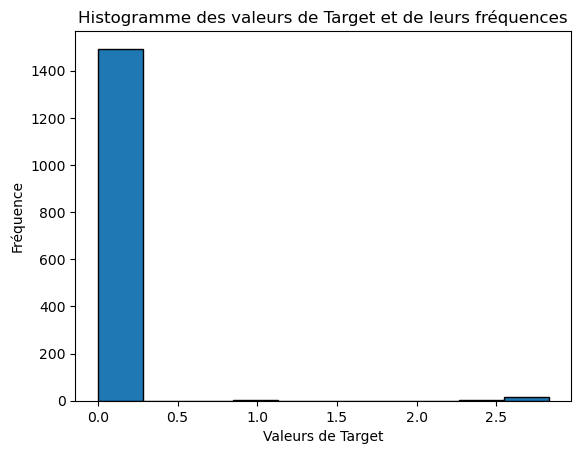

In [24]:
import matplotlib.pyplot as plt

# Créer un histogramme des valeurs de grouped_data.target
plt.hist(grouped_data['target'], bins=10, edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Valeurs de Target')
plt.ylabel('Fréquence')
plt.title('Histogramme des valeurs de Target et de leurs fréquences')

In [25]:
# Filtrer les textes dans grouped_data où target n'est pas nul
non_zero_texts = grouped_data[grouped_data['target'] != 0]['text']

# Supprimer les lignes dans data où 'text' est dans non_zero_texts
data = data[~data['text'].isin(non_zero_texts)]

La valeur de 4 porte à confusion, on va changer pour 1

In [27]:
# Remplacer la valeur 4 par 1 dans la colonne 'target'
data['target'] = data['target'].replace(4, 1)

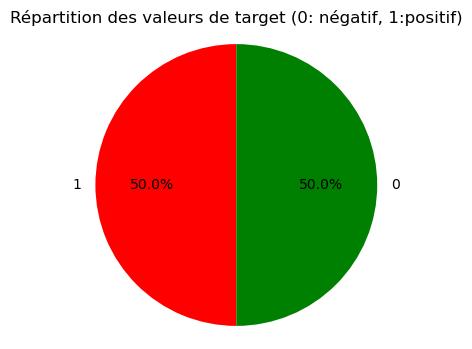

In [28]:
# Répartition des valeurs de la colonne 'target'
repartition_target = data['target'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(repartition_target, labels=repartition_target.index, autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title('Répartition des valeurs de target (0: négatif, 1:positif)')
plt.axis('equal')  # Pour s'assurer que le pie chart est bien circulaire
plt.show()

## Problématique métier
Le client demande de détecter les bad buzz, lors de l'appréciation de performance du modèle les faux positifs seront plus pénalisants que les faux négatifs. On s'appuiera donc sur la mesure de précision.<br>

## Exploration et nettoyage du vocabulaire

### Détection de la langue

In [32]:
# pip install spacy-langdetect
# ! pip install tqdm

In [33]:
## cellule inactivée: temps d'exécution de 3h30 !!!
# import pandas as pd
# import spacy
# from spacy_langdetect import LanguageDetector
# from spacy.language import Language
# from tqdm import tqdm

# # Fonction pour ajouter le détecteur de langue à spaCy
# def get_lang_detector(nlp, name):
#     return LanguageDetector()

# # Charger le modèle de langue anglais
# nlp = spacy.load("en_core_web_sm")

# # Vérifiez si l'usine existe déjà
# if "language_detector" not in nlp.pipe_names:
#     Language.factory("language_detector", func=get_lang_detector)
#     nlp.add_pipe('language_detector', last=True)

# # Fonction pour détecter la langue
# def detect_language(text):
#     doc = nlp(text)
#     return doc._.language['language']

# # Appliquer la détection de langue avec une barre de progression
# tqdm.pandas()  # Activer tqdm pour les pandas DataFrame
# data['language'] = data['text'].progress_apply(detect_language)
# data = data[data['language'] == 'en']

# # Supprimer la colonne 'language' si elle n'est plus nécessaire
# data = data.drop(columns=['language'])

# data.shape


In [34]:
# Sauvegarder le DataFrame data
# data.to_csv('./data/data_preprocessed.csv', index=False)

data = pd.read_csv('./data/data_preprocessed.csv')

### Nettoyage (adapté aux tweets)

In [36]:
%time
import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import numpy as np
import pandas as pd
import sklearn

# Libraries and packages for text (pre-)processing 
import string
import re
import nltk

print("Python version:", sys.version)
print("Version info.:", sys.version_info)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("skearn version:", sklearn.__version__)
print("re version:", re.__version__)
print("nltk version:", nltk.__version__)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

CPU times: total: 0 ns
Wall time: 0 ns
Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Version info.: sys.version_info(major=3, minor=11, micro=7, releaselevel='final', serial=0)
pandas version: 2.2.2
numpy version: 1.24.4
skearn version: 1.5.0
re version: 2.2.1
nltk version: 3.8.1


#### Données

Nous allons tester nos fonctions sur quelques lignes sélectionnées au hasard

In [90]:
import random

# Choisir trois indices au hasard
random_indices = random.sample(range(len(data)), 10)

# Créer un DataFrame avec les lignes sélectionnées
data_sample = pd.DataFrame({key: [data[key][i] for i in random_indices] for key in data})

# Afficher les lignes sélectionnées pour vérification
# for idx in random_indices:
#     print(data["text"][idx])
#     # print(data["text_clean"][idx])
pd.set_option('display.max_colwidth', None)
display(data_sample)

,target,ids,date,flag,user,text,cleaned_text,tokenized,preprocessed_text,tokens
0,1,2191565221,Tue Jun 16 05:32:17 PDT 2009,NO_QUERY,FatihV,"watching 007 the movie with hi-def and hi-fi. What a job, ha?","Watching 07 the movie with hi-def and hi-fi. What a job, ha?","[Watching, 07, the, movie, with, hi-def, and, hi-fi, ., What, a, job, ,, ha, ?]","watching 07 movie hi-def hi-fi . job , ha ?","[watching, 07, movie, hi-def, hi-fi, ., job, ,, ha, ?]"
1,1,2014640719,Wed Jun 03 02:12:00 PDT 2009,NO_QUERY,diyagirl,I think @azamroselan is enjoying sleeping in.. Shhh shhh...,"I think is enjoying sleping in. Sh, sh.","[I, think, is, enjoying, sleping, in, ., Sh, ,, sh, .]","think enjoying sleping . sh , sh .","[think, enjoying, sleping, ., sh, ,, sh, .]"
2,0,2263225170,Sun Jun 21 00:15:40 PDT 2009,NO_QUERY,insertsmiley,"@sarahteaa yeah same situation here, my black ones are all muddy but my blue ones is for wash too oh well","yeah, same situation here, my black ones are al mudy, but my blue ones are for wash to oh wel","[yeah, ,, same, situation, here, ,, my, black, ones, are, al, mudy, ,, but, my, blue, ones, are, for, wash, to, oh, wel]","yeah , situation , black one al mudy , blue one wash oh wel","[yeah, ,, situation, ,, black, one, al, mudy, ,, blue, one, wash, oh, wel]"
3,1,2062616866,Sat Jun 06 23:45:51 PDT 2009,NO_QUERY,jebus26,Shows over... Fun stuff,Shows over. Fun stuf,"[Shows, over, ., Fun, stuf]",show . fun stuf,"[show, ., fun, stuf]"
4,1,1980201329,Sun May 31 06:01:33 PDT 2009,NO_QUERY,thehappykid,@khyci all the best.,Al the best.,"[Al, the, best, .]",al best .,"[al, best, .]"
5,1,2013901660,Tue Jun 02 23:53:48 PDT 2009,NO_QUERY,reporter4651,"what about those cars? Huge square ford LTD's I think, well that's what they look like 2 me!","What about those cars? Huge square ford LTD's I think, wel that's what they lok like 2 me!","[What, about, those, cars, ?, Huge, square, ford, LTD, 's, I, think, ,, wel, that, 's, what, they, lok, like, 2, me, !]","car ? huge square ford ltd 's think , wel 's lok like 2 !","[car, ?, huge, square, ford, ltd, 's, think, ,, wel, 's, lok, like, 2, !]"
6,0,2238023932,Fri Jun 19 06:42:45 PDT 2009,NO_QUERY,jennsbookshelf,@toofondofbooks how frustrating,How frustrating,"[How, frustrating]",frustrating,[frustrating]
7,1,1981266854,Sun May 31 08:47:29 PDT 2009,NO_QUERY,ZaraGreen,@deegospel Sounds like a fun! I'm stirrin' shyt up about life after marriage...we all know it changes - some good &amp; some...well u know,Sounds like a fun! I'm stirin' shyt up about life after mariage. We al know it changes - some god &amp; some.wel u know,"[Sounds, like, a, fun, !, I, 'm, stirin, ', shyt, up, about, life, after, mariage, ., We, al, know, it, changes, -, some, god, &, amp, ;, some.wel, u, know]",sound like fun ! 'm stirin ' shyt life mariage . al know change - god & amp ; some.wel u know,"[sound, like, fun, !, 'm, stirin, ', shyt, life, mariage, ., al, know, change, -, god, &, amp, ;, some.wel, u, know]"
8,0,1551964640,Sat Apr 18 10:25:58 PDT 2009,NO_QUERY,WhoTheEff,Did I mention another one of my kitties is dying?,Did I mention another one of my kities is dying?,"[Did, I, mention, another, one, of, my, kities, is, dying, ?]",mention another one kities dying ?,"[mention, another, one, kities, dying, ?]"
9,1,2189001840,Mon Jun 15 23:01:30 PDT 2009,NO_QUERY,LusciousLather,Detoxing my skin with this awesome mask. http://bit.ly/yXGec,Detoxing my skin with this awesome mask.,"[Detoxing, my, skin, with, this, awesome, mask, .]",detoxing skin awesome mask .,"[detoxing, skin, awesome, mask, .]"


In [92]:
import spacy

# Tokenisation avec Spacy# Charger le modèle de langue
nlp = spacy.load('en_core_web_sm')

# Tokeniser les textes
data_sample['tokens'] = data_sample['text'].apply(lambda x: [token.text for token in nlp(x)])

# Afficher les lignes sélectionnées et tokenisées pour vérification
pd.set_option('display.max_colwidth', None)
display(data_sample)

,target,ids,date,flag,user,text,cleaned_text,tokenized,preprocessed_text,tokens
0,1,2191565221,Tue Jun 16 05:32:17 PDT 2009,NO_QUERY,FatihV,"watching 007 the movie with hi-def and hi-fi. What a job, ha?","Watching 07 the movie with hi-def and hi-fi. What a job, ha?","[Watching, 07, the, movie, with, hi-def, and, hi-fi, ., What, a, job, ,, ha, ?]","watching 07 movie hi-def hi-fi . job , ha ?","[watching, 007, the, movie, with, hi, -, def, and, hi, -, fi, ., What, a, job, ,, ha, ?]"
1,1,2014640719,Wed Jun 03 02:12:00 PDT 2009,NO_QUERY,diyagirl,I think @azamroselan is enjoying sleeping in.. Shhh shhh...,"I think is enjoying sleping in. Sh, sh.","[I, think, is, enjoying, sleping, in, ., Sh, ,, sh, .]","think enjoying sleping . sh , sh .","[I, think, @azamroselan, is, enjoying, sleeping, in, .., , Shhh, shhh, ...]"
2,0,2263225170,Sun Jun 21 00:15:40 PDT 2009,NO_QUERY,insertsmiley,"@sarahteaa yeah same situation here, my black ones are all muddy but my blue ones is for wash too oh well","yeah, same situation here, my black ones are al mudy, but my blue ones are for wash to oh wel","[yeah, ,, same, situation, here, ,, my, black, ones, are, al, mudy, ,, but, my, blue, ones, are, for, wash, to, oh, wel]","yeah , situation , black one al mudy , blue one wash oh wel","[@sarahteaa, yeah, same, situation, here, ,, my, black, ones, are, all, muddy, but, my, blue, ones, is, for, wash, too, , oh, well]"
3,1,2062616866,Sat Jun 06 23:45:51 PDT 2009,NO_QUERY,jebus26,Shows over... Fun stuff,Shows over. Fun stuf,"[Shows, over, ., Fun, stuf]",show . fun stuf,"[Shows, over, ..., Fun, stuff]"
4,1,1980201329,Sun May 31 06:01:33 PDT 2009,NO_QUERY,thehappykid,@khyci all the best.,Al the best.,"[Al, the, best, .]",al best .,"[@khyci, all, the, best, .]"
5,1,2013901660,Tue Jun 02 23:53:48 PDT 2009,NO_QUERY,reporter4651,"what about those cars? Huge square ford LTD's I think, well that's what they look like 2 me!","What about those cars? Huge square ford LTD's I think, wel that's what they lok like 2 me!","[What, about, those, cars, ?, Huge, square, ford, LTD, 's, I, think, ,, wel, that, 's, what, they, lok, like, 2, me, !]","car ? huge square ford ltd 's think , wel 's lok like 2 !","[what, about, those, cars, ?, Huge, square, ford, LTD, 's, I, think, ,, well, that, 's, what, they, look, like, 2, me, !, ]"
6,0,2238023932,Fri Jun 19 06:42:45 PDT 2009,NO_QUERY,jennsbookshelf,@toofondofbooks how frustrating,How frustrating,"[How, frustrating]",frustrating,"[@toofondofbooks, how, frustrating]"
7,1,1981266854,Sun May 31 08:47:29 PDT 2009,NO_QUERY,ZaraGreen,@deegospel Sounds like a fun! I'm stirrin' shyt up about life after marriage...we all know it changes - some good &amp; some...well u know,Sounds like a fun! I'm stirin' shyt up about life after mariage. We al know it changes - some god &amp; some.wel u know,"[Sounds, like, a, fun, !, I, 'm, stirin, ', shyt, up, about, life, after, mariage, ., We, al, know, it, changes, -, some, god, &, amp, ;, some.wel, u, know]",sound like fun ! 'm stirin ' shyt life mariage . al know change - god & amp ; some.wel u know,"[@deegospel, Sounds, like, a, fun, !, I, 'm, stirrin, ', shyt, up, about, life, after, marriage, ..., we, all, know, it, changes, -, some, good, &, amp, ;, some, ..., well, u, know]"
8,0,1551964640,Sat Apr 18 10:25:58 PDT 2009,NO_QUERY,WhoTheEff,Did I mention another one of my kitties is dying?,Did I mention another one of my kities is dying?,"[Did, I, mention, another, one, of, my, kities, is, dying, ?]",mention another one kities dying ?,"[Did, I, mention, another, one, of, my, kitties, is, dying, ?]"
9,1,2189001840,Mon Jun 15 23:01:30 PDT 2009,NO_QUERY,LusciousLather,Detoxing my skin with this awesome mask. http://bit.ly/yXGec,Detoxing my skin with this awesome mask.,"[Detoxing, my, skin, with, this, awesome, mask, .]",detoxing skin awesome mask .,"[Detoxing, my, skin, with, this, awesome, mask, ., , http://bit.ly/yXGec]"


In [94]:
import nltk
from nltk.tokenize import word_tokenize

# Assurez-vous d'avoir téléchargé les ressources nécessaires
# nltk.download('punkt')

def count_total_tokens(data_sample, col):
    total_tokens = 0
    for text in data_sample[col]:
        tokens = word_tokenize(text)
        total_tokens += len(tokens)
    print("Nombre total de tokens :", total_tokens)
    return total_tokens

In [96]:
count_total_tokens(data_sample, "text")

Nombre total de tokens : 144


144

#### Fonctions

In [99]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [101]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text'] = data_sample['text'].apply(remove_URL)

# Afficher les textes d'origine et les textes modifiés (en bleu)
from IPython.display import display, HTML

def display_texts(data_sample, col1, col2):
    html = ""
    for original, cleaned in zip(data_sample[col1], data_sample[col2]):
        html += f"<p>Original: {original}<br>Modifié: <span style='color:blue'>{cleaned}</span></p>"
    display(HTML(html))

display_texts(data_sample, "text", "cleaned_text")

In [103]:
def remove_mentions(text):
    """
    Remove mentions (words starting with @) from a sample string
    """
    return re.sub(r"@\w+", "", text)

In [105]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text2'] = data_sample['cleaned_text'].apply(remove_mentions)

display_texts(data_sample, "cleaned_text", "cleaned_text2")

In [107]:
def reduce_repetitions(text):
    """
    Reduce character repetitions in a sample string
    """
    return re.sub(r'(.)\1{2,}', r'\1\1', text)

In [109]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text3'] = data_sample['cleaned_text2'].apply(reduce_repetitions)

display_texts(data_sample, "text", "cleaned_text3")

In [111]:
import re

def other_clean(text):
    """
    Other manual text cleaning techniques
    """
    # Typos, slang and other
    sample_typos_slang = {
        "w/e": "whatever",
        "usagov": "usa government",
        "recentlu": "recently",
        "ph0tos": "photos",
        "amirite": "am i right",
        "exp0sed": "exposed",
        "luv": "love",
        "amageddon": "armageddon",
        "trfc": "traffic",
        "a/c": "air conditioning",
        "16yr": "16 year",
        "NYC": "New York",
        "hahaha": "laughs"
    }

    # Sentiments emoticon as characters
    sample_emoticons = {
        ":)": "smile",
        ":(": "sad",
        ":D": "grin",
        "XD": "laugh",
        ":'(": "cry",
        ":P": "playful",
        ";)": "wink",
        ":O": "surprised",
        ":/": "skeptical",
        ":|": "neutral",
        ":*": "kiss",
        ":-)": "smile",
        ":-(": "sad",
        ":-D": "grin",
        ":-P": "playful",
        ";-)": "wink",
        ":-O": "surprised",
        ":-/": "skeptical",
        ":-|": "neutral",
        ":-*": "kiss",
        "<3": "love"
    }

    # Common abbreviations
    sample_abbr = {
        "$": " dollar ",
        "€": " euro ",
        "4ao": "for adults only",
        "a.m": "before midday",
        "a3": "anytime anywhere anyplace",
        "aamof": "as a matter of fact",
        "acct": "account",
        "adih": "another day in hell",
        "afaic": "as far as i am concerned",
        "afaict": "as far as i can tell",
        "afaik": "as far as i know",
        "afair": "as far as i remember",
        "afk": "away from keyboard",
        "app": "application",
        "approx": "approximately",
        "apps": "applications",
        "asap": "as soon as possible",
        "asl": "age, sex, location",
        "atk": "at the keyboard",
        "ave.": "avenue",
        "ayor": "at your own risk",
        "b&b": "bed and breakfast",
        "b.c": "before christ",
        "b2b": "business to business",
        "b2c": "business to customer",
        "b4": "before",
        "bae": "before anyone else",
        "bak": "back at keyboard",
        "bbc": "british broadcasting corporation",
        "bfn": "bye for now",
        "blvd": "boulevard",
        "bout": "about",
        "brb": "be right back",
        "bros": "brothers",
        "btw": "by the way",
        "c/o": "care of",
        "cia": "central intelligence agency",
        "cu": "see you",
        "cv": "curriculum vitae",
        "dm": "direct message",
        "&": "and",
        "eg": "example",
        "faq": "frequently asked questions",
        "fb": "facebook",
        "ftw": "for the win",
        "fyi": "for your information",
        "glhf": "good luck have fun",
        "gn": "good night",
        "gmt": "greenwich mean time",
        "gps": "global positioning system",
        "gr8": "great",
        "gtfo": "get the fuck out",
        "irl": "in real life",
        "jk": "just kidding",
        "l8r": "later",
        "lol": "laughing out loud",
        "omg": "oh my god",
        "pov": "point of view",
        "smh": "shake my head",
        "tbh": "to be honest",
        "ttyl": "talk to you later",
        "wtf": "what the fuck"
    }

    # Adapted regex to capture emoticons preceded by spaces or punctuation
    sample_typos_slang_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in sample_typos_slang.keys()) + r')\b')
    sample_emoticons_pattern = re.compile(r'(\s|[.?!])(' + '|'.join(re.escape(key) for key in sample_emoticons.keys()) + r')(?!\w)')
    sample_abbr_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')\b')
    
    # Replace typos, slang, and abbreviations in text
    text = sample_typos_slang_pattern.sub(lambda x: sample_typos_slang[x.group()], text)
    text = sample_emoticons_pattern.sub(lambda x: x.group(1) + sample_emoticons[x.group(2)], text)
    text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)
    
    return text



In [113]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text4'] = data_sample['cleaned_text3'].apply(other_clean)

display_texts(data_sample, "text", "cleaned_text4")

In [115]:
def remove_special_characters(text):
    """
    Remove special characters and malformed emoticons from a sample string
    """
    # Supprimer les hashtags
    text = re.sub(r"#\w+", "", text)
    # Supprimer les caractères non-ASCII
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    return text

In [117]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text5'] = data_sample['cleaned_text4'].apply(remove_special_characters)

display_texts(data_sample, "text", "cleaned_text5")

In [119]:
count_total_tokens(data_sample, "cleaned_text5")

Nombre total de tokens : 131


131

### Correction d'orthographe

In [56]:
# ! pip install language-tool-python
import language_tool_python

In [121]:
# Initialiser l'outil LanguageTool pour le français
tool = language_tool_python.LanguageTool('en')

# Fonction pour corriger l'orthographe
def correct_spelling(text):
    matches = tool.check(text)
    corrected_text = language_tool_python.utils.correct(text, matches)
    return corrected_text


# Appliquer la fonction à la colonne
data_sample['cleaned_text6'] = data_sample['cleaned_text5'].apply(correct_spelling)

display_texts(data_sample, "text", "cleaned_text6")

#### Regroupement des fonctions de traitement de texte manuel

In [59]:
# Dictionnaries of common language specifics of tweets
# Typos, slang and other
sample_typos_slang = {
    "w/e": "whatever",
    "usagov": "usa government",
    "recentlu": "recently",
    "ph0tos": "photos",
    "amirite": "am i right",
    "exp0sed": "exposed",
    "luv": "love",
    "amageddon": "armageddon",
    "trfc": "traffic",
    "a/c": "air conditioning",
    "16yr": "16 year",
    "NYC": "New York",
    "hahaha": "laughs"
}

# Sentiments emoticon as characters
sample_emoticons = {
    ":)": "smile",
    ":(": "sad",
    ":D": "grin",
    ";D": "joke",
    "XD": "laugh",
    ":'(": "cry",
    ":P": "playful",
    ";)": "wink",
    ":O": "surprised",
    ":/": "skeptical",
    ":|": "neutral",
    ":*": "kiss",
    ":-)": "smile",
    ":-(": "sad",
    ":-D": "grin",
    ":-P": "playful",
    ";-)": "wink",
    ":-O": "surprised",
    ":-/": "skeptical",
    ":-|": "neutral",
    ":-*": "kiss",
    "<3": "love"
}

# Common abbreviations
sample_abbr = {
    "$": " dollar ",
    "€": " euro ",
    "4ao": "for adults only",
    "a.m": "before midday",
    "a3": "anytime anywhere anyplace",
    "aamof": "as a matter of fact",
    "acct": "account",
    "adih": "another day in hell",
    "afaic": "as far as i am concerned",
    "afaict": "as far as i can tell",
    "afaik": "as far as i know",
    "afair": "as far as i remember",
    "afk": "away from keyboard",
    "app": "application",
    "approx": "approximately",
    "apps": "applications",
    "asap": "as soon as possible",
    "asl": "age, sex, location",
    "atk": "at the keyboard",
    "ave.": "avenue",
    "ayor": "at your own risk",
    "b&b": "bed and breakfast",
    "b.c": "before christ",
    "b2b": "business to business",
    "b2c": "business to customer",
    "b4": "before",
    "bae": "before anyone else",
    "bak": "back at keyboard",
    "bbc": "british broadcasting corporation",
    "bfn": "bye for now",
    "blvd": "boulevard",
    "bout": "about",
    "brb": "be right back",
    "bros": "brothers",
    "btw": "by the way",
    "c/o": "care of",
    "cia": "central intelligence agency",
    "cu": "see you",
    "cv": "curriculum vitae",
    "dm": "direct message",
    "&": "and",
    "eg": "example",
    "faq": "frequently asked questions",
    "fb": "facebook",
    "ftw": "for the win",
    "fyi": "for your information",
    "glhf": "good luck have fun",
    "gn": "good night",
    "gmt": "greenwich mean time",
    "gps": "global positioning system",
    "gr8": "great",
    "gtfo": "get the fuck out",
    "irl": "in real life",
    "jk": "just kidding",
    "l8r": "later",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "pov": "point of view",
    "smh": "shake my head",
    "tbh": "to be honest",
    "ttyl": "talk to you later",
    "wtf": "what the fuck"
}

In [63]:
def clean_text(text, sample_typos_slang=sample_typos_slang,
              sample_emoticons=sample_emoticons,
              sample_abbr=sample_abbr):
    """
    Clean text by removing URLs, mentions, special characters, and other manual cleaning techniques
    """
    
    # Remove URLs
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    
    # Remove mentions
    text = re.sub(r"@\w+", "", text)

    # Reduce repetitions
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    
    for key, value in sample_typos_slang.items():
        text = re.sub(r'\b' + re.escape(key) + r'\b', value, text)
    
    for key, value in sample_emoticons.items():
        pattern = r'(\s|[.?!])(' + re.escape(key) + r')(?!\w)'
        text = re.sub(pattern, r'\1' + value, text)
    
    sample_abbr_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')\b')
    text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)
    
    # Remove special characters and malformed emoticons
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    
    # Correct spelling
    text = correct_spelling(text)
    
    return text


#### Application des fonctions sur l'ensemble du dataset

In [66]:
from tqdm import tqdm

# Appliquer la fonction avec suivi de progression
tqdm.pandas(desc="Cleaning Text")
data["cleaned_text"] = data["text"].progress_apply(clean_text)

Cleaning Text: 100%|██████████████████████████████████████████████████████| 1479395/1479395 [12:38:37<00:00, 32.50it/s]


In [67]:
display(data[['text', 'cleaned_text']])

,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D","- Aw, that's a bumer. You shoulda got David Car of Third Day to do it. Joke"
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,Is upset that he can't update his Facebok by texting it. And might cry as a result Schol today also. Blah!
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,I dived many times for the bal. Managed to save 50% The rest go out of bounds
3,my whole body feels itchy and like its on fire,My whole body fels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","No, it's not behaving at al. I'm mad. Why am I here? Because I can't se you al over there."
...,...,...
1479390,Just woke up. Having no school is the best feeling ever,Just woke up. Having no schol is the best feling ever
1479391,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta,TheWDB.com - Very col to hear old Walt interviews!
1479392,Are you ready for your MoJo Makeover? Ask me for details,Are you ready for your MoJo Makeover? Ask me for details
1479393,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur,Hapy 38th Birthday to my bo of al time! Tupac Amaru Shakur


In [7]:
# Sauvegarder le DataFrame data
# data.to_csv('./data/data_cleaned.csv', index=False)
import pandas as pd
data = pd.read_csv('./data/data_cleaned.csv')

### Tokenisation et normalisation du vocabulaire

### Tokenisation

In [229]:
# Tokenizing the tweet base texts.
from nltk.tokenize import word_tokenize

In [231]:
data['tokenized'] = data['cleaned_text'].apply(word_tokenize)

In [232]:
display(data[['text', 'tokenized']])

,text,tokenized
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D","[-, Aw, ,, that, 's, a, bumer, ., You, shoulda, got, David, Car, of, Third, Day, to, do, it, ., Joke]"
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,"[Is, upset, that, he, ca, n't, update, his, Facebok, by, texting, it, ., And, might, cry, as, a, result, Schol, today, also, ., Blah, !]"
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,"[I, dived, many, times, for, the, bal, ., Managed, to, save, 50, %, The, rest, go, out, of, bounds]"
3,my whole body feels itchy and like its on fire,"[My, whole, body, fels, itchy, and, like, its, on, fire]"
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","[No, ,, it, 's, not, behaving, at, al, ., I, 'm, mad, ., Why, am, I, here, ?, Because, I, ca, n't, se, you, al, over, there, .]"
...,...,...
1479390,Just woke up. Having no school is the best feeling ever,"[Just, woke, up, ., Having, no, schol, is, the, best, feling, ever]"
1479391,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta,"[TheWDB.com, -, Very, col, to, hear, old, Walt, interviews, !]"
1479392,Are you ready for your MoJo Makeover? Ask me for details,"[Are, you, ready, for, your, MoJo, Makeover, ?, Ask, me, for, details]"
1479393,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur,"[Hapy, 38th, Birthday, to, my, bo, of, al, time, !, Tupac, Amaru, Shakur]"


In [233]:
# Extraire les tokens uniques de la colonne 'tokenized'
tokens_uniques = set(token for tokens in data["tokenized"] for token in tokens)

# Afficher le nombre total de tokens uniques
nombre_total_tokens = len(tokens_uniques)
print(f"Nombre total de tokens dans le vocabulaire : {nombre_total_tokens}")

Nombre total de tokens dans le vocabulaire : 406340


### Réduction du vocabulaire (préprocessing manuel)

In [283]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Assurez-vous d'avoir téléchargé les ressources nécessaires de NLTK
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Initialiser le lemmatizer et les stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_tokens(tokens):
    # Transformer en minuscule, supprimer les stopwords et effectuer la lemmatisation
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    text = ' '.join(tokens)
    
    # Supprimer les ponctuations spécifiques
    text = re.sub(r'(?<!\.)\.(?!\.)', '', text)  # Supprime les points simples mais pas les doubles points
    text = re.sub(r',', '', text)  # Supprime les virgules
    text = re.sub(r'/', '', text)  # Supprime les slashs
    
    return text

# Appliquer la fonction à la colonne 'tokenized' et créer une nouvelle colonne 'preprocessed_text'
data['preprocessed_text'] = data['tokenized'].apply(preprocess_tokens)


In [284]:
data.head()


,target,ids,date,flag,user,text,cleaned_text,sentiment_score,tokenized,preprocessed_text,preprocessed_tokenized
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D","- Aw, that's a bumer. You shoulda got David Car of Third Day to do it. Joke",1,"[-, Aw, ,, that, 's, a, bumer, ., You, shoulda, got, David, Car, of, Third, Day, to, do, it, ., Joke]",- aw 's bumer shoulda got david car third day joke,"[-, aw, ,, 's, bumer, ., shoulda, got, david, car, third, day, ., joke]"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,Is upset that he can't update his Facebok by texting it. And might cry as a result Schol today also. Blah!,0,"[Is, upset, that, he, ca, n't, update, his, Facebok, by, texting, it, ., And, might, cry, as, a, result, Schol, today, also, ., Blah, !]",upset ca n't update facebok texting might cry result schol today also blah !,"[upset, ca, n't, update, facebok, texting, ., might, cry, result, schol, today, also, ., blah, !]"
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,I dived many times for the bal. Managed to save 50% The rest go out of bounds,1,"[I, dived, many, times, for, the, bal, ., Managed, to, save, 50, %, The, rest, go, out, of, bounds]",dived many time bal managed save 50 % rest go bound,"[dived, many, time, bal, ., managed, save, 50, %, rest, go, bound]"
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,My whole body fels itchy and like its on fire,1,"[My, whole, body, fels, itchy, and, like, its, on, fire]",whole body fels itchy like fire,"[whole, body, fels, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","No, it's not behaving at al. I'm mad. Why am I here? Because I can't se you al over there.",0,"[No, ,, it, 's, not, behaving, at, al, ., I, 'm, mad, ., Why, am, I, here, ?, Because, I, ca, n't, se, you, al, over, there, .]",'s behaving al 'm mad ? ca n't se al,"[,, 's, behaving, al, ., 'm, mad, ., ?, ca, n't, se, al, .]"


In [285]:
# Tokeniser les textes dans la colonne 'preprocessed_text'
data['preprocessed_tokenized'] = data['preprocessed_text'].apply(word_tokenize)

# Extraire les tokens uniques de la colonne 'preprocessed_text'
tokens_uniques_final = set(token for tokens in data["preprocessed_tokenized"] for token in tokens)

# Afficher le nombre total de tokens uniques
nombre_total_tokens_final = len(tokens_uniques_final)
print(f"Nombre total de tokens dans le vocabulaire : {nombre_total_tokens_final}")

Nombre total de tokens dans le vocabulaire : 301699


On a pu réduire de 25% le nombre de tokens.

### Utilisation d'un embedding donnant la polarité d'une phrase

#### NLTK SentimentIntensityAnalyser
source: https://www.kaggle.com/code/ashagutlapalli/nlp-101-with-nltk-and-spacy-text-analysis

Sentiment Analysis using NLTK: 
Sick!  who gets a cold... In June ? => {'neg': 0.418, 'neu': 0.582, 'pos': 0.0, 'compound': -0.5562}
Compound score (0 if negative, 1 if positive): 0


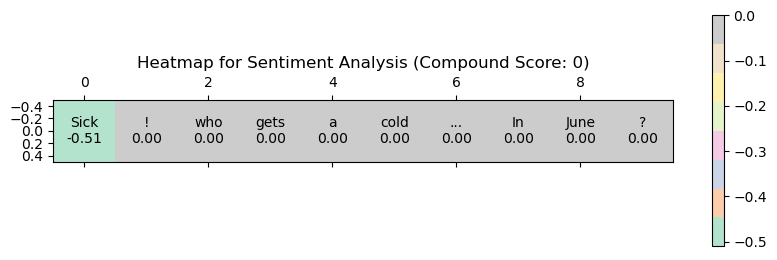

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Exemple de texte
text = data['text'].sample(1).iloc[0]

# Initialiser SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Obtenir les scores de polarité pour chaque mot dans la phrase
words = word_tokenize(text)
scores = [sia.polarity_scores(word)['compound'] for word in words]

# Convertir les scores en tableau numpy
x = np.array([scores])

# Calculer le score global avec un arrondi
polarity_scores1 = sia.polarity_scores(text)
compound_score = round((polarity_scores1['compound'] + 1) / 2)

print(f"Sentiment Analysis using NLTK: \n{text} => {polarity_scores1}")
print(f"Compound score (0 if negative, 1 if positive): {compound_score}")

# Créer la heatmap
fig, ax = plt.subplots(figsize=(10, 3))
cax = ax.matshow(x, cmap="Pastel2")

# Ajouter les annotations
for (i, j), val in np.ndenumerate(x):
    ax.text(j, i, f"{words[j]}\n{val:.2f}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title(f'Heatmap for Sentiment Analysis (Compound Score: {compound_score})')
plt.show()


##### Fonction donnant le score sia depuis une colonne de dataframe

In [262]:
import numpy as np
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

def sentiment_scores(df, column_name):
    # Initialiser SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    # Fonction pour obtenir le score de polarité global pour une phrase
    def get_compound_score(text):
        polarity_scores = sia.polarity_scores(text)
        compound_score = round((polarity_scores['compound'] + 1) / 2)
        return compound_score
    
    # Appliquer la fonction à la colonne spécifiée du DataFrame
    scores = df[column_name].apply(get_compound_score)
    
    return scores

# Obtenir les scores de sentiment avec un seuil
scores_raw_text = sentiment_scores(data, "text")


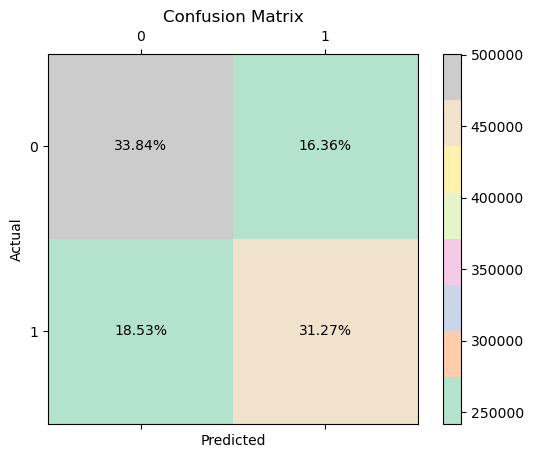

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66    742646
           1       0.66      0.63      0.64    736749

    accuracy                           0.65   1479395
   macro avg       0.65      0.65      0.65   1479395
weighted avg       0.65      0.65      0.65   1479395



In [263]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], scores_raw_text)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel2")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], scores_raw_text)
print("Classification Report:\n", report)


In [264]:
scores_preprocessed_text = sentiment_scores(data, "preprocessed_text")

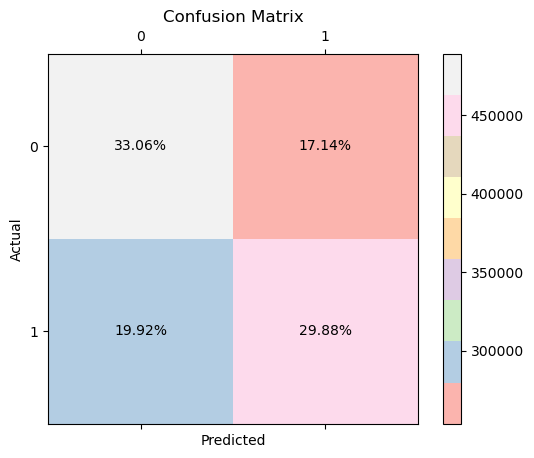

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64    742646
           1       0.64      0.60      0.62    736749

    accuracy                           0.63   1479395
   macro avg       0.63      0.63      0.63   1479395
weighted avg       0.63      0.63      0.63   1479395



In [265]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], scores_preprocessed_text)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel1")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], scores_preprocessed_text)
print("Classification Report:\n", report)


#### Spacy TextBlob

In [268]:
import pandas as pd
from textblob import TextBlob

def analyse_sentiments_textblob(df, column_name):
    # Fonction pour obtenir le score de sentiment
    def get_sentiment_score(text):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        score = round((polarity + 1) / 2)
        return score
    
    # Appliquer la fonction à la colonne spécifiée du DataFrame
    df['sentiment_score'] = df[column_name].apply(get_sentiment_score)
    
    return df['sentiment_score']


scores_raw_textblob = analyse_sentiments_textblob(data, 'text')

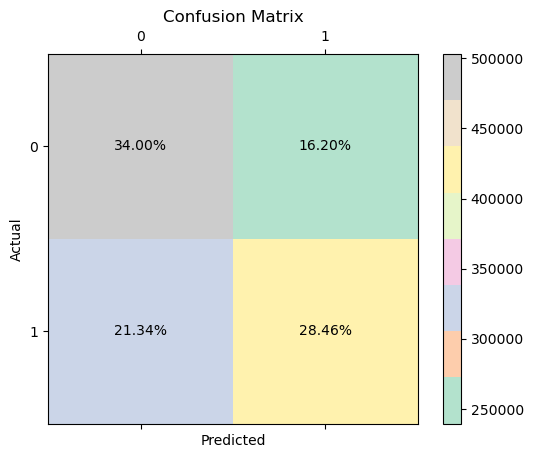

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.68      0.64    742646
           1       0.64      0.57      0.60    736749

    accuracy                           0.62   1479395
   macro avg       0.63      0.62      0.62   1479395
weighted avg       0.63      0.62      0.62   1479395



In [277]:
# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], scores_raw_textblob)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel2")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], scores_raw_textblob)
print("Classification Report:\n", report)

<div class="alert alert-block alert-danger">
    <b>Le calcul de NLTK (utilisant VADER, outil spécifiquement élaboré pour l'analyse de tweets) est plus rapide et produit beaucoup moins de faux positifs que TextBlob. On peut bien sûr ajuster le seuil de détection pour les minimiser mais l'exactitude de prédiction restera au même niveau. Considérons plutôt qu'il s'agit d'une baseline. A noter également que VADER n'a pas besoin de l'ensemble des pré-traitements que nous avons effectués ; au contraire ils dégradent légèrement le résultat.</b>
</div>

### Préparation des données à la modélisation

La manipulation d'un nombre important de données est consommateur de temps. Nous allons comparer les performances des modèles sur un échantillon que nous allons séparer en train/test.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Echantillonage
df_sample, _ = train_test_split(data, test_size=0.9, stratify=data["target"])

In [9]:
df_sample.shape

(147939, 7)

In [10]:
# Séparation en train/test
train_df, test_df = train_test_split(df_sample, test_size=0.3, stratify=df_sample['target'])

print("Taille de l'ensemble d'entraînement :", len(train_df))
print("Taille de l'ensemble de test :", len(test_df))

Taille de l'ensemble d'entraînement : 103557
Taille de l'ensemble de test : 44382


In [11]:
train_df

,target,ids,date,flag,user,text,cleaned_text
770675,1,1557271765,Sun Apr 19 03:03:41 PDT 2009,NO_QUERY,fayyy,@hellokimmy when are you leaving to KL? lol,When are you leaving to KL? Laughing out loud
1318366,1,2058914187,Sat Jun 06 15:52:47 PDT 2009,NO_QUERY,amybaker,is getting ready to go play some slot machines...,Is geting ready to go play some slot machines ...
6205,0,1469502203,Tue Apr 07 06:34:35 PDT 2009,NO_QUERY,divinerae,@atiyah9369 I know it is chilly!........i feel...,I know it is chily!.i fel bad I sent Broklyn ...
1163617,1,1997513469,Mon Jun 01 16:59:04 PDT 2009,NO_QUERY,BenedictLim,sooo... Tony Danza Summer Extravaganza Backyar...,So. Tony Danza Sumer Extravaganza Backyard Bon...
337018,0,2047695741,Fri Jun 05 14:02:20 PDT 2009,NO_QUERY,gummie2509,First day of the summer and i can't find anyth...,First day of the sumer and I can't find anythi...
...,...,...,...,...,...,...,...
721169,0,2322260837,Wed Jun 24 22:18:47 PDT 2009,NO_QUERY,chiolove,@OfficialRockets is Yao out indefinitely? Plea...,Is Yao out indefinitely? Please say it's just...
384632,0,2060853460,Sat Jun 06 19:42:21 PDT 2009,NO_QUERY,majorlakerfan22,"Right now, putting aloe on my sunburn feels li...","Right now, puting aloe on my sunburn fels like..."
887263,1,1825219865,Sun May 17 04:51:25 PDT 2009,NO_QUERY,SarahSee95,I'm obsessed with eating GRAPES! So yummy!,I'm obsesed with eating GRAPES! So yumy!
851912,1,1753585656,Sun May 10 02:22:51 PDT 2009,NO_QUERY,mycahearten,she's smarter and classier. she's perfect for ...,She's smarter and clasier. She's perfect for h...


In [12]:
# Sauvegarde des dataframe train et test
train_df.to_csv('./data/train_df.csv', index=True)
test_df.to_csv('./data/test_df.csv', index=True)